# Project 1- Predict Selling Price of a vehicle using Regression Techniques 

### 1. Varad Khot         -  242262008
### 2. Toshi Tiwari       -  242262019
### 3. Ashish Thigale  -  242262018

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# About Dataset 

### This dataset consists of various features on which selling price of a vehicle depends. The goal is to predict the selling price of a vehicle considering the given attributes using various regression techniques.

In [2]:
df = pd.read_csv('Car_Price_Details.csv')

In [3]:
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [5]:
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

# Convert the data type for the required columns

In [6]:
# We have power data with us so we do not require torque data

df.drop(columns=['torque'],inplace=True)

In [7]:
df['mileage']=df['mileage'].astype('str')
df['mileage'] = df['mileage'].str.split(expand=True)[0]
df['mileage']

0        23.4
1       21.14
2        17.7
3        23.0
4        16.1
        ...  
8123     18.5
8124     16.8
8125     19.3
8126    23.57
8127    23.57
Name: mileage, Length: 8128, dtype: object

In [8]:
df['engine']= df['engine'].astype('str')
df['engine'] = df['engine'].str.split(expand=True)[0]
df['engine']

0       1248
1       1498
2       1497
3       1396
4       1298
        ... 
8123    1197
8124    1493
8125    1248
8126    1396
8127    1396
Name: engine, Length: 8128, dtype: object

In [9]:
df['max_power']=df['max_power'].astype('str')
df['max_power'] = df['max_power'].str.split(expand=True)[0]
df['max_power']

0           74
1       103.52
2           78
3           90
4         88.2
         ...  
8123     82.85
8124       110
8125      73.9
8126        70
8127        70
Name: max_power, Length: 8128, dtype: object

In [10]:
df['mileage'] = df['mileage'].astype('float64')
df['engine'] = df['engine'].astype('float64')
df=df.loc[~df['max_power'].isin(['bhp'])]
df['max_power'] = df['max_power'].astype('float64')

In [11]:
df.nunique()

name             2057
year               29
selling_price     677
km_driven         921
fuel                4
seller_type         3
transmission        2
owner               5
mileage           381
engine            121
max_power         319
seats               9
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8127 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8127 non-null   object 
 1   year           8127 non-null   int64  
 2   selling_price  8127 non-null   int64  
 3   km_driven      8127 non-null   int64  
 4   fuel           8127 non-null   object 
 5   seller_type    8127 non-null   object 
 6   transmission   8127 non-null   object 
 7   owner          8127 non-null   object 
 8   mileage        7906 non-null   float64
 9   engine         7906 non-null   float64
 10  max_power      7912 non-null   float64
 11  seats          7906 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 825.4+ KB


In [13]:
# Check for duplicates
df.duplicated().sum()

1202

In [14]:
# Drop duplicates
df.drop_duplicates(inplace = True)

df.duplicated().sum()

0

In [15]:
# Check for missing values
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          208
engine           208
max_power        205
seats            208
dtype: int64

In [16]:
df['mileage'].fillna(value = df['mileage'].mean(), inplace = True)

df['engine'].fillna(value = df['engine'].mean(), inplace = True)

df['max_power'].fillna(value = df['max_power'].mean(), inplace = True)

df['seats'].fillna(value = df['seats'].mean(), inplace = True)

df['seats'] = df['seats'].astype('int64')

In [17]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

# EDA

AxesSubplot(0.125,0.657941;0.352273x0.222059)


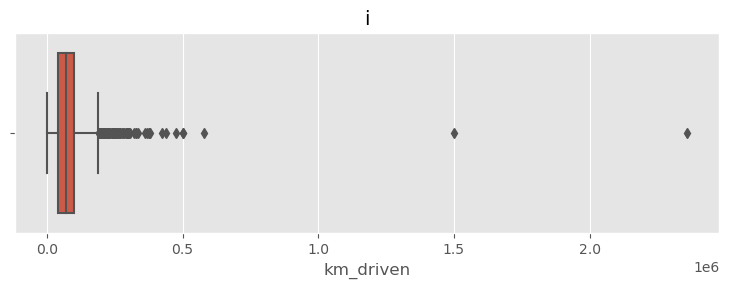

AxesSubplot(0.125,0.657941;0.352273x0.222059)


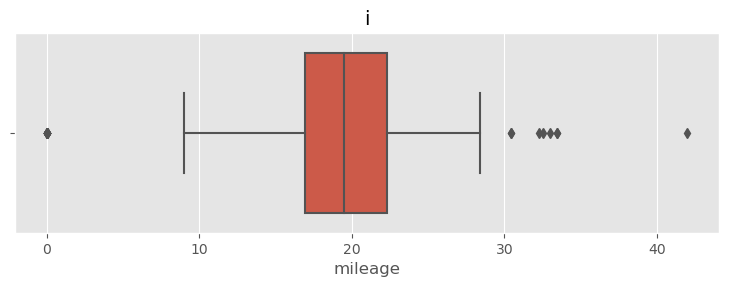

AxesSubplot(0.125,0.657941;0.352273x0.222059)


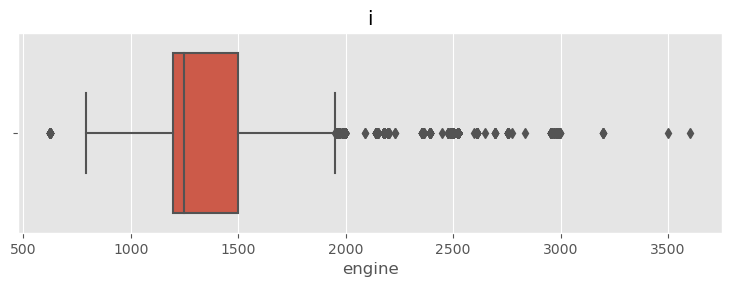

AxesSubplot(0.125,0.657941;0.352273x0.222059)


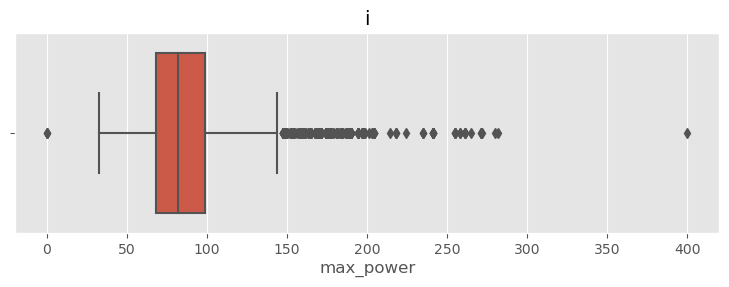

AxesSubplot(0.125,0.657941;0.352273x0.222059)


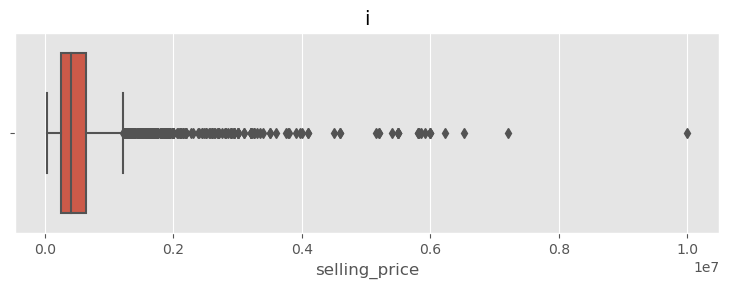

In [18]:
for i in ['km_driven','mileage','engine','max_power','selling_price']:
    a = 1
    plt.figure(figsize=(20,9),dpi=100)
    plt.subplot(3,2,a)
    print(sns.boxplot(data = df,x=i))
    plt.title('i')
    a+=1    
    plt.show()
    

### Remove Outliers

In [19]:
for col in ['km_driven','mileage','engine','max_power','selling_price']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

### Feature Engineering

In [20]:
df['Company'] = df['name'].str.split(expand=True)[0].str.lower()
df['Model'] = df['name'].str.split().str[0:2].str.join(' ').str.lower()
df.drop(columns = ['name'],inplace = True)

In [21]:
def plot_num(df,col):
    fig ,ax = plt.subplots(1,2,figsize=(16,4))
    sns.histplot(df,x=col,kde=True,ax=ax[0])
    sns.boxplot(data=df,x=col,ax=ax[1])
    ax[0].set_title(f'Distribution of {col}')
    ax[1].set_title(f'{col} Boxplot')
    fig.show();

### Selling Price

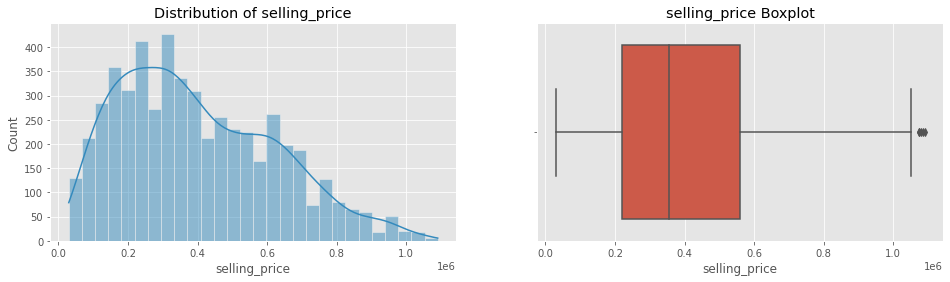

In [22]:
plot_num(df,'selling_price')

### Year

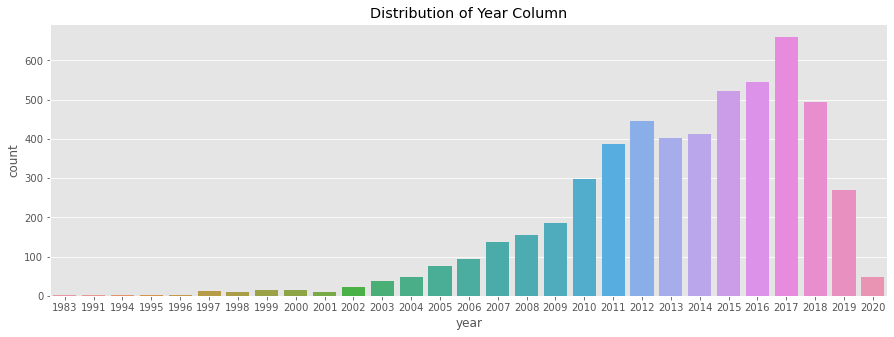

In [23]:
plt.figure(figsize=(15,5))
sns.countplot(data = df,x='year');
plt.title('Distribution of Year Column');

### Km_driven

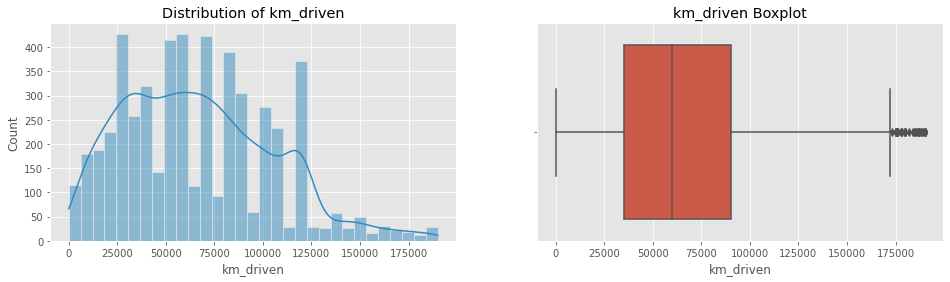

In [24]:
plot_num(df,'km_driven')

### Fuel Type

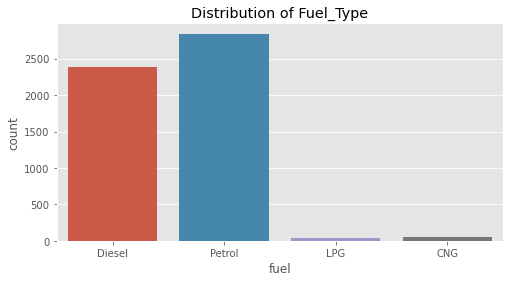

In [25]:
plt.figure(figsize=(8,4))
sns.countplot(data = df,x='fuel');
plt.title('Distribution of Fuel_Type');

In [26]:
df['fuel'].value_counts()

Petrol    2842
Diesel    2391
CNG         47
LPG         35
Name: fuel, dtype: int64

### Fuel Types with low frequency should be excluded to prevent modelling issues.

In [27]:
df = df[~df['fuel'].isin(['LPG','CNG'])]

### Transmission

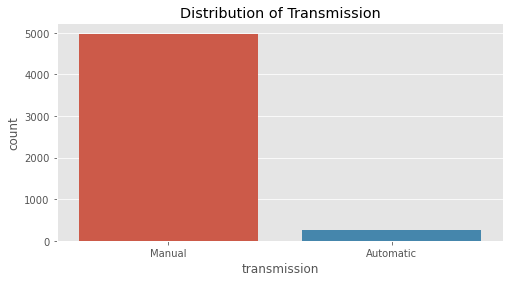

In [28]:
plt.figure(figsize=(8,4))
sns.countplot(data = df,x='transmission');
plt.title('Distribution of Transmission');

### Owner Type

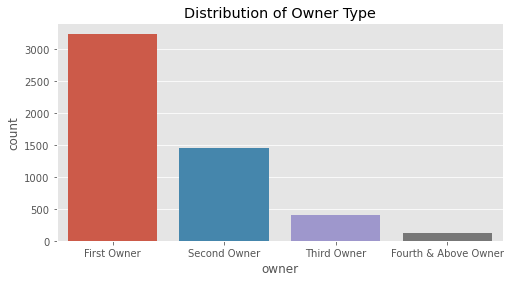

In [29]:
plt.figure(figsize=(8,4))
sns.countplot(data = df,x='owner');
plt.title('Distribution of Owner Type');

### Mileage

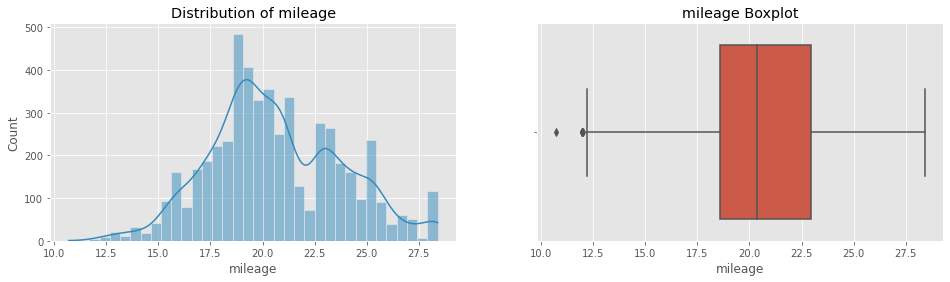

In [30]:
plot_num(df,'mileage')

### Engine

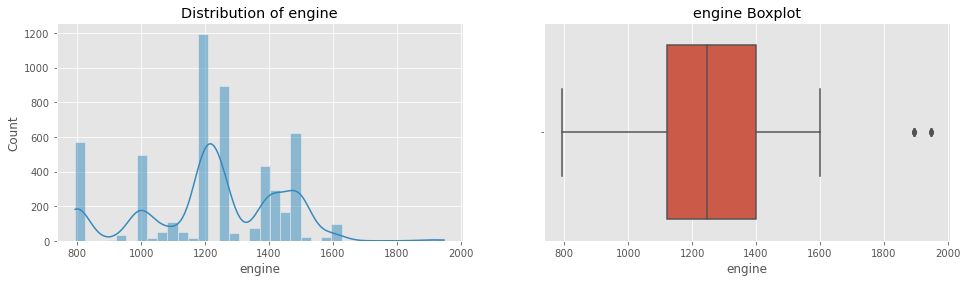

In [31]:
plot_num(df,'engine')

### Power

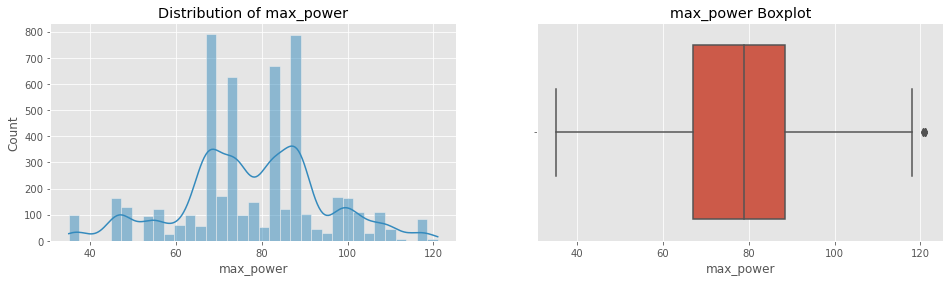

In [32]:
plot_num(df,'max_power')

### Seats

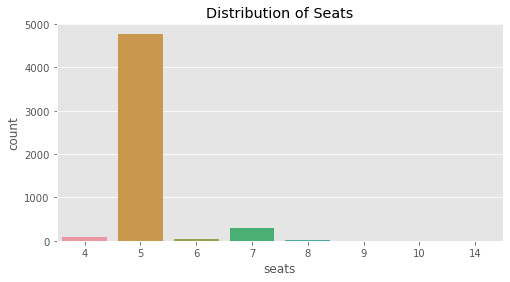

In [33]:
plt.figure(figsize=(8,4))
sns.countplot(data = df,x='seats');
plt.title('Distribution of Seats');

### Exclude seats with low frequency

In [34]:
df = df[df.seats.between(4,8)]

In [35]:
df['seats'].value_counts()

5    4774
7     297
4      86
6      40
8      29
Name: seats, dtype: int64

### Company

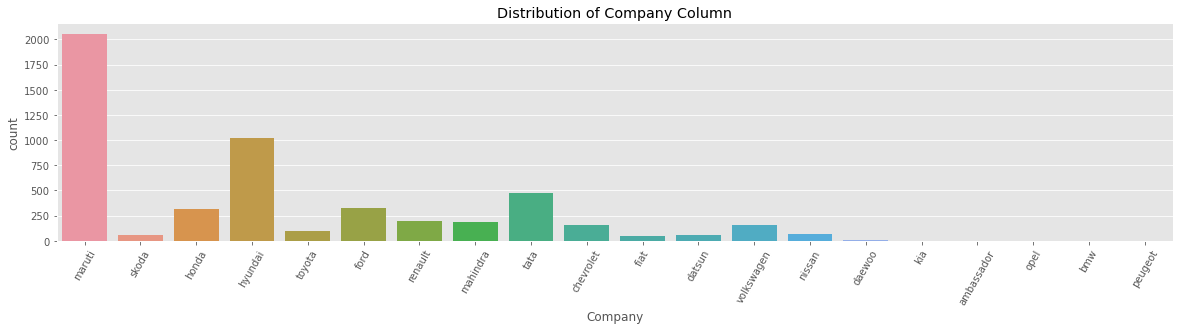

In [36]:
plt.figure(figsize=(20,4))
sns.countplot(data = df,x='Company');
plt.xticks(rotation=60)
plt.title('Distribution of Company Column');

### Model

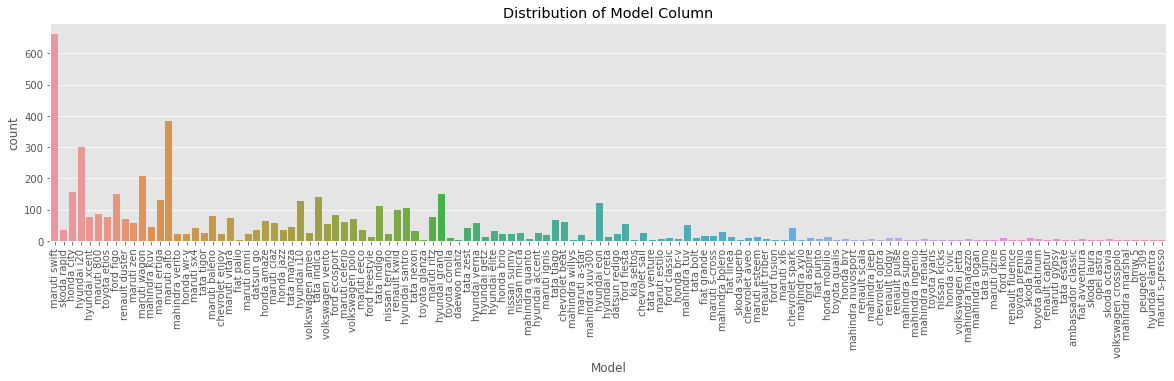

In [37]:
plt.figure(figsize=(20,4))
sns.countplot(data = df,x='Model',orient='h');
plt.xticks(rotation=90)
plt.title('Distribution of Model Column');

In [38]:
df['Model'].value_counts()

maruti swift        663
maruti alto         384
hyundai i20         300
maruti wagon        209
honda city          157
                   ... 
skoda superb          1
toyota premio         1
mahindra ingenio      1
mahindra xylo         1
maruti s-presso       1
Name: Model, Length: 127, dtype: int64

### We should drop car models with low frequency

In [39]:
counts = df.Model.value_counts()
to_drop = counts[counts<10].index.tolist()
df = df[~df['Model'].isin(to_drop)]

In [40]:
df['Model'].value_counts()

maruti swift      663
maruti alto       384
hyundai i20       300
maruti wagon      209
honda city        157
                 ... 
honda mobilio      11
toyota corolla     10
renault lodgy      10
ford ikon          10
skoda fabia        10
Name: Model, Length: 72, dtype: int64

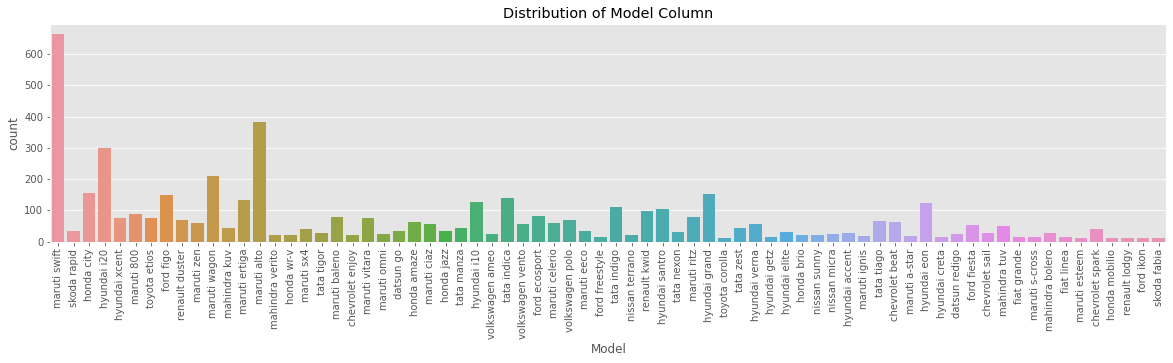

In [41]:
plt.figure(figsize=(20,4))
sns.countplot(data = df,x='Model',orient='h');
plt.xticks(rotation=90)
plt.title('Distribution of Model Column');

### Selling price vs km driven

<AxesSubplot:xlabel='km_driven', ylabel='selling_price'>

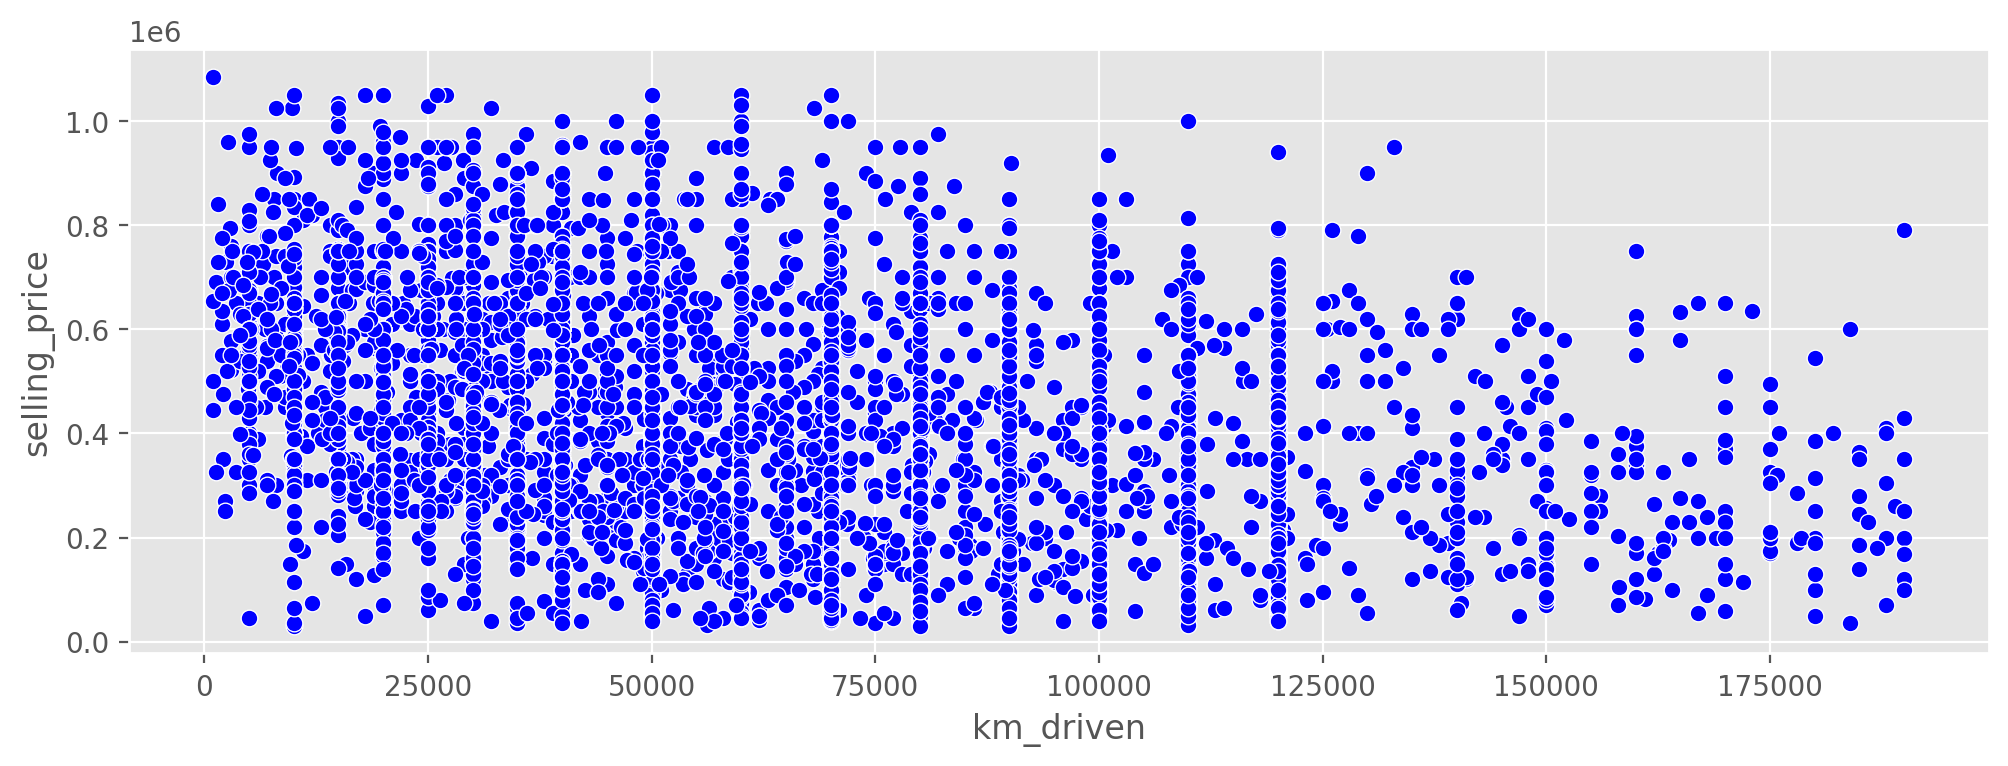

In [42]:
plt.figure(figsize = (12,4), dpi = 200)

sns.scatterplot('km_driven','selling_price', data = df, color = 'blue')

### Conclusion: As the Km driven increases, selling price decreases.

In [43]:
df['mileage'].min()

12.0

In [44]:
df['mileage'].max()

28.4

### Selling price vs mileage

([<matplotlib.axis.XTick at 0x15090cef250>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

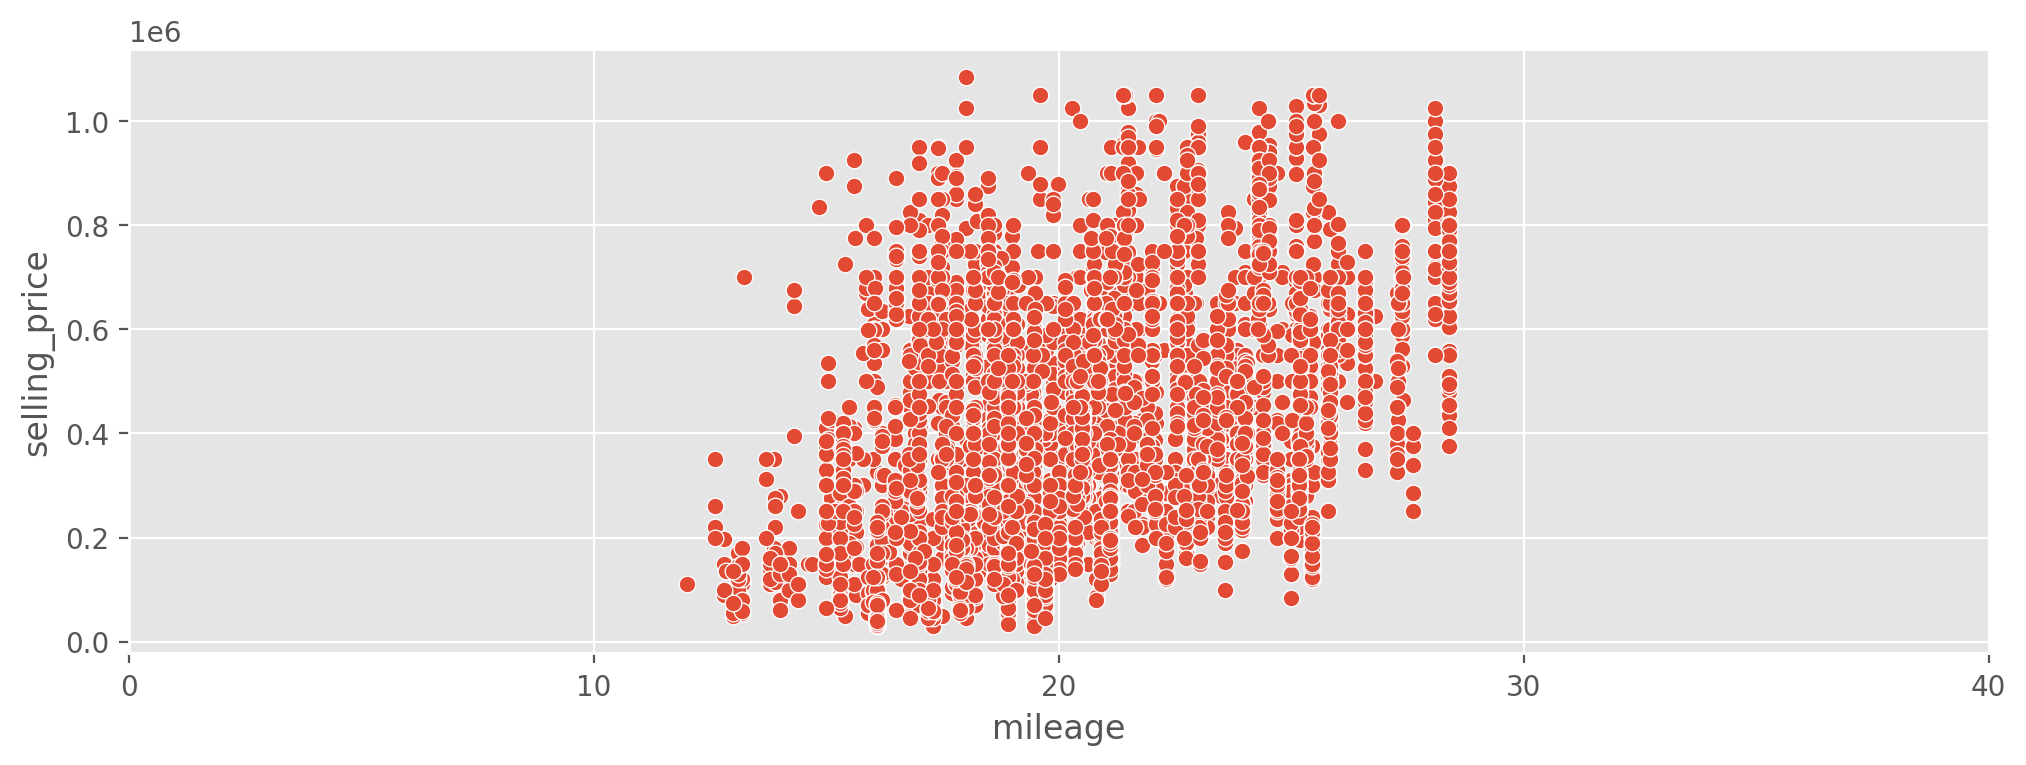

In [45]:
plt.figure(figsize = (12,4), dpi = 200)

sns.scatterplot('mileage','selling_price', data = df)

plt.xticks(range(0,45,10))

### Conclusion - Not sure

###  Selling price vs owner

<AxesSubplot:xlabel='owner', ylabel='selling_price'>

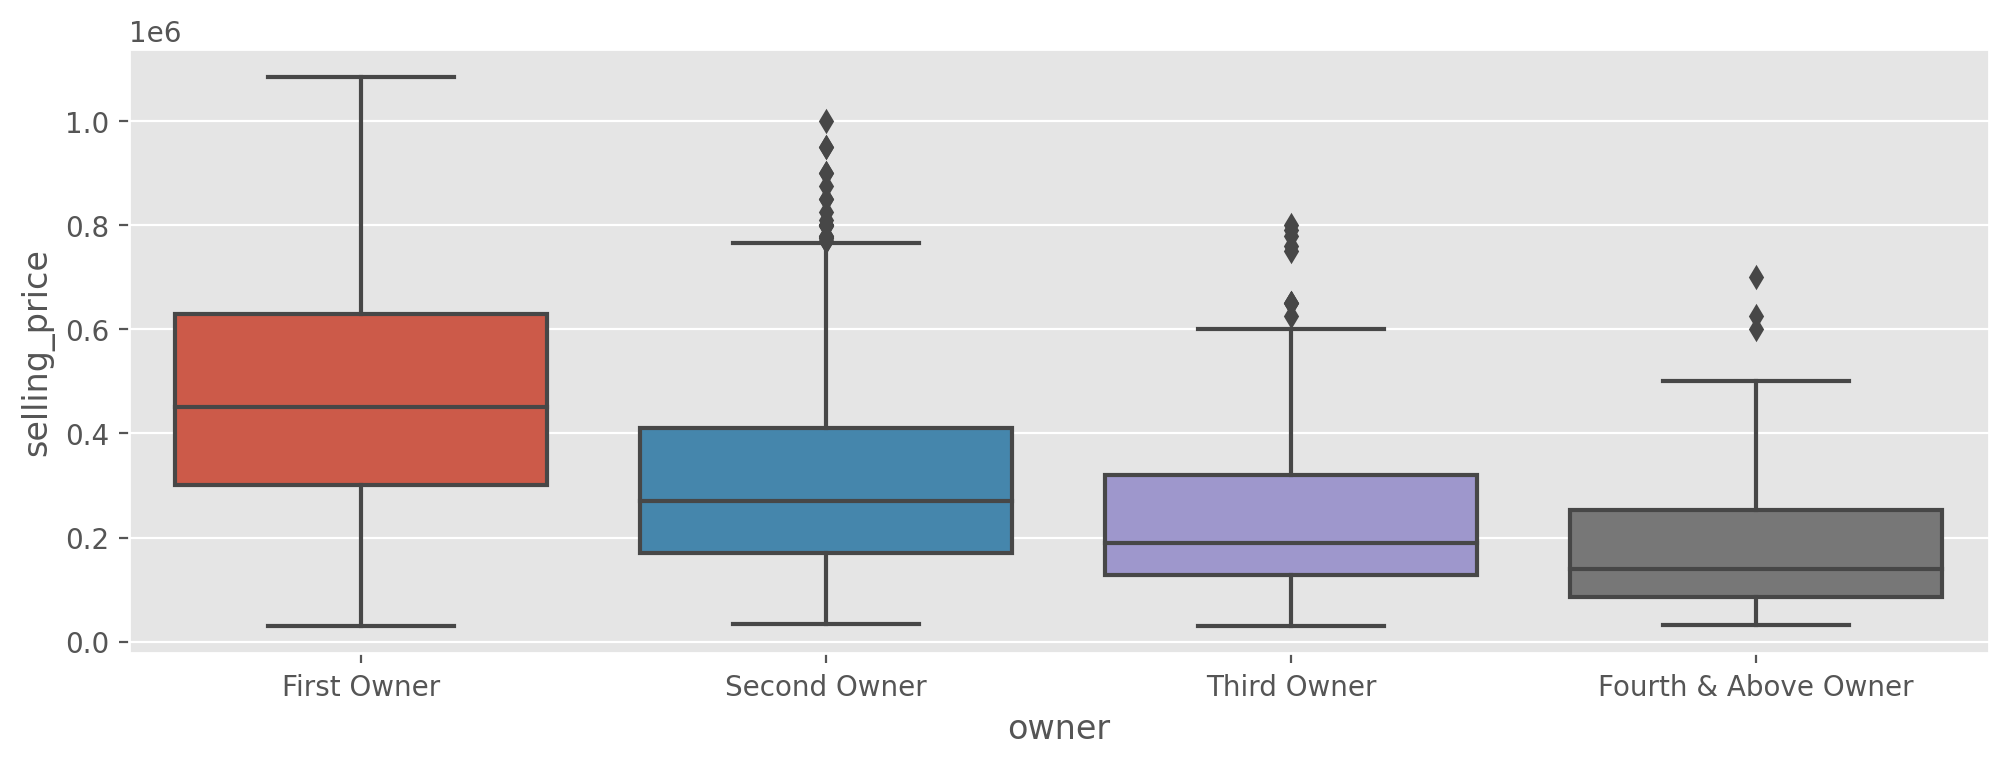

In [46]:
plt.figure(figsize = (12,4), dpi = 200)

# we can drop the 'Test Drive car' data points. 
df = df[~(df['owner'] == 'Test Drive Car')]

sns.boxplot('owner','selling_price', data = df)

### Conclusion : As the number of owners increases, the price decreases.

### Selling price vs seats

<AxesSubplot:xlabel='seats', ylabel='selling_price'>

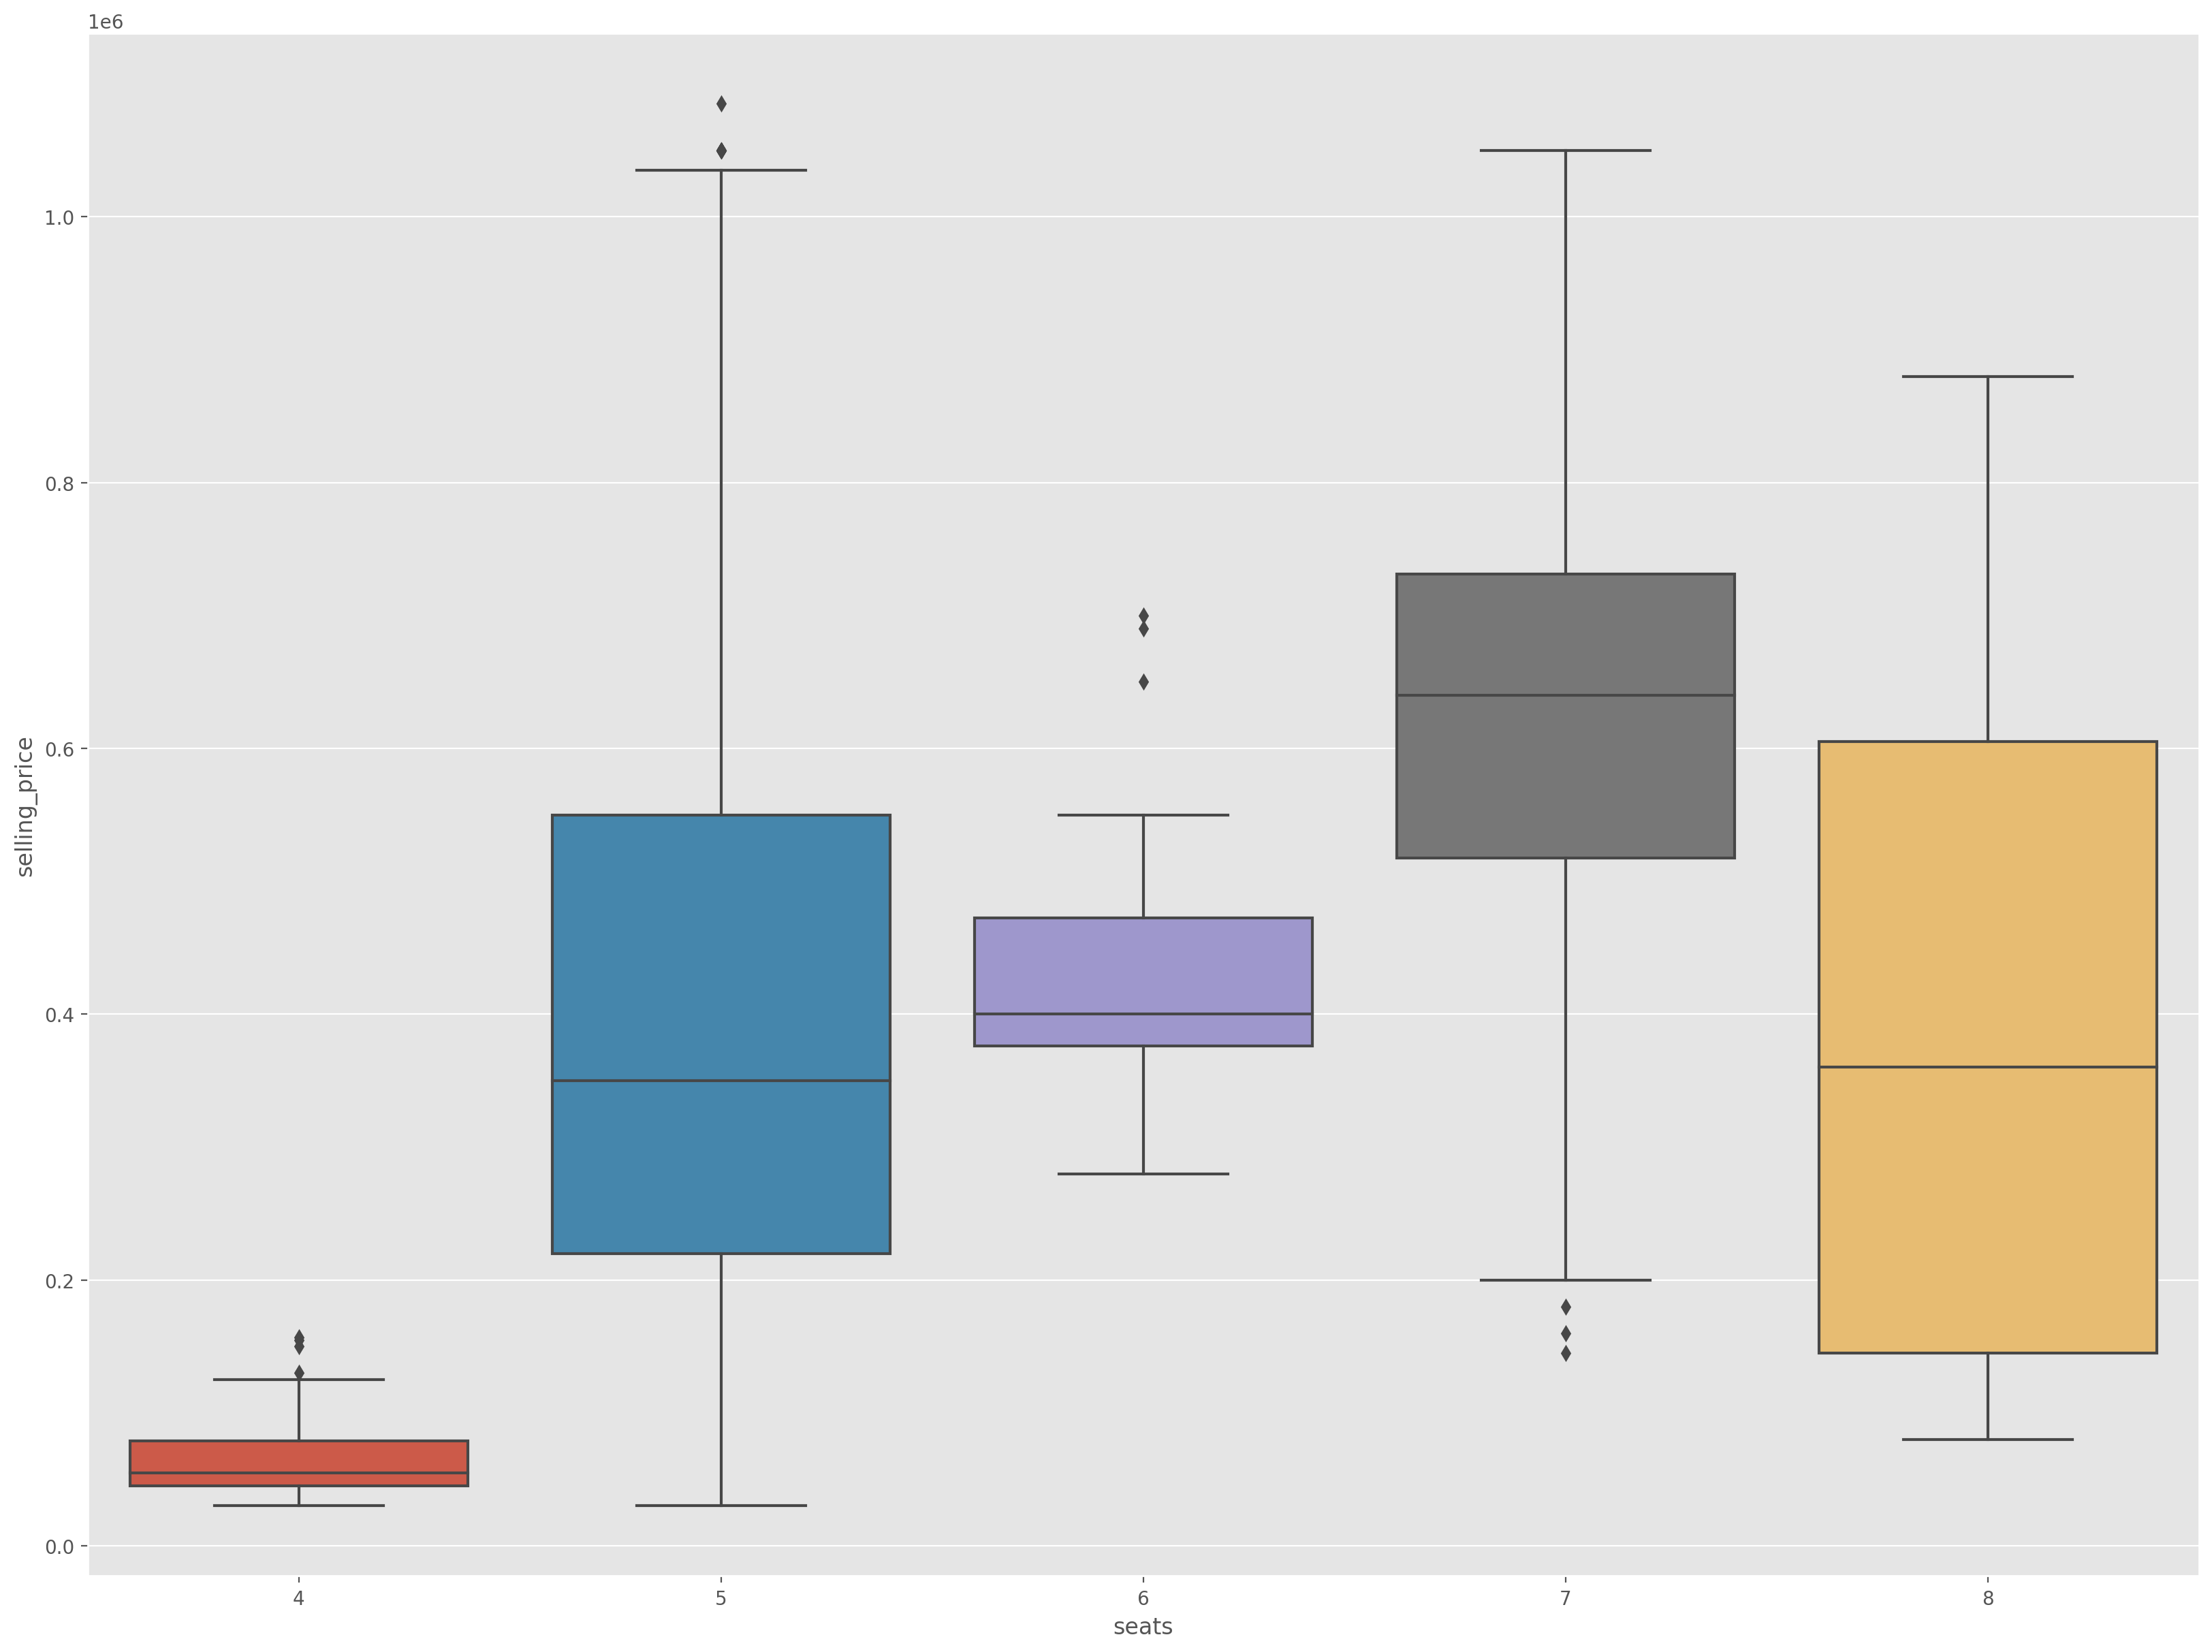

In [47]:
plt.figure(figsize = (20,15), dpi = 200)

sns.boxplot('seats','selling_price', data = df)

###  Conclusion - We can get the idea of mean selling price as per the number of seats

### Selling price vs year

<AxesSubplot:xlabel='year', ylabel='selling_price'>

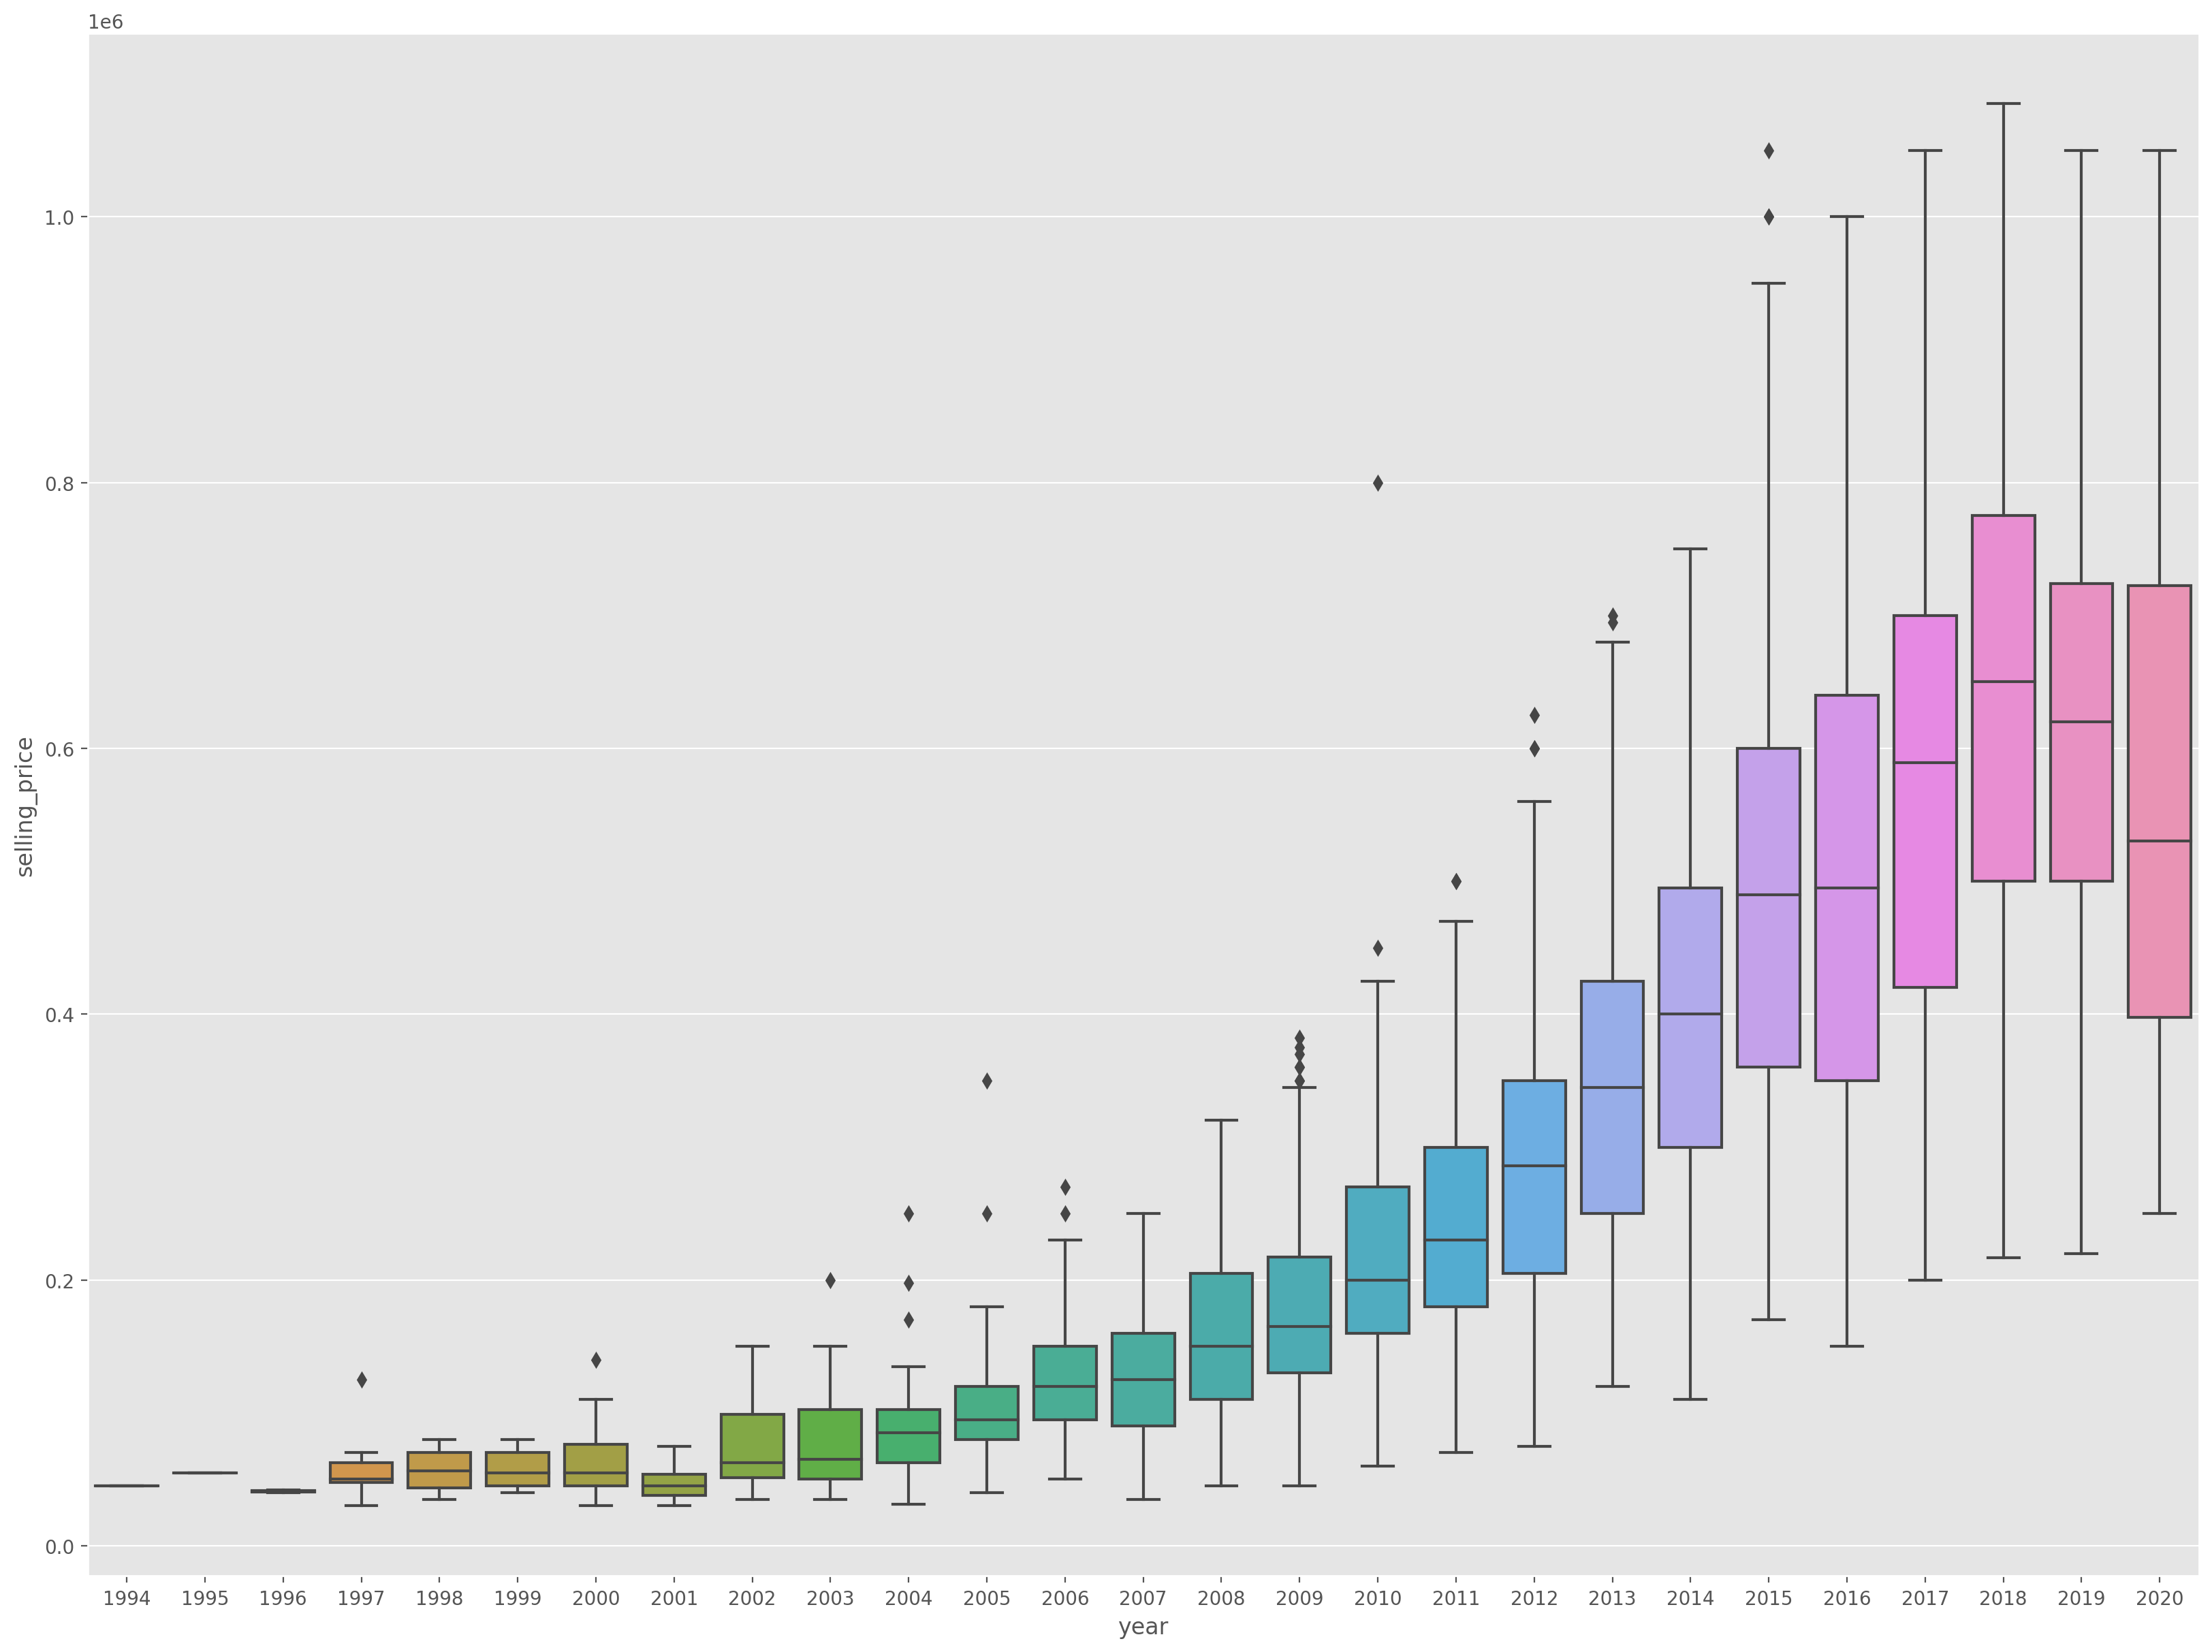

In [48]:
plt.figure(figsize = (20,15), dpi = 200)

sns.boxplot('year','selling_price', data = df)

### Conclusion : New cars as per the year also have high selling price except year 2020.(Covid 19 Pandemic)

###  Selling price vs fuel

<AxesSubplot:xlabel='fuel', ylabel='selling_price'>

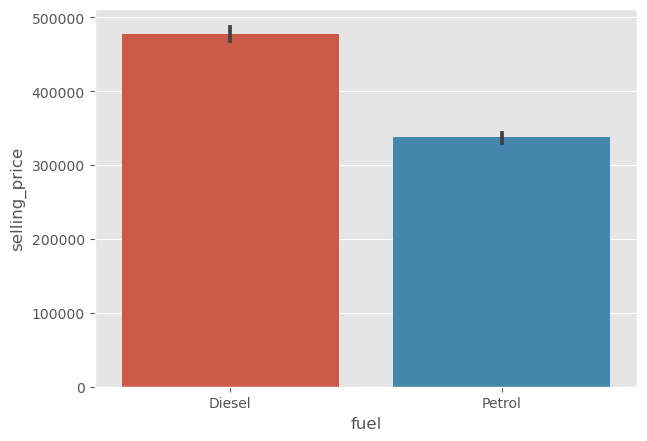

In [49]:
order = pd.DataFrame(df.groupby('fuel')['selling_price'].mean()).sort_values(ascending = False, by = 'selling_price')

index = order.index

plt.figure(figsize = (7,5), dpi = 100)

sns.barplot('fuel','selling_price', data = df, order = index)

### Conclusion : Diesel > Petrol (selling price comparison based on fuel type) 

### Selling price vs transmission

<AxesSubplot:xlabel='transmission', ylabel='selling_price'>

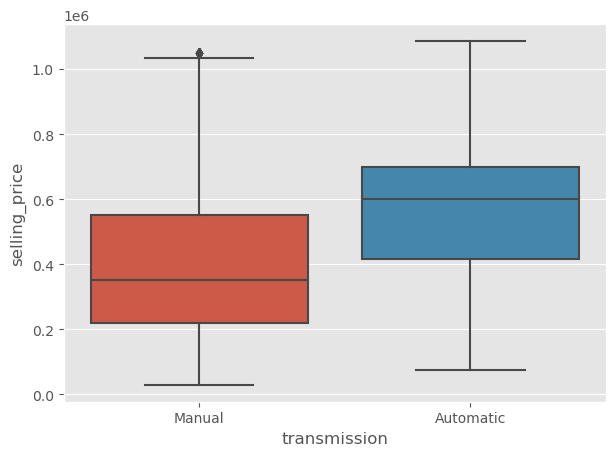

In [50]:
plt.figure(figsize = (7,5), dpi = 100)

sns.boxplot('transmission','selling_price', data = df)

### Conclusion : Automatic transmission cars have higher selling price than manual transmission.

### Selling price vs engine

<AxesSubplot:xlabel='engine', ylabel='selling_price'>

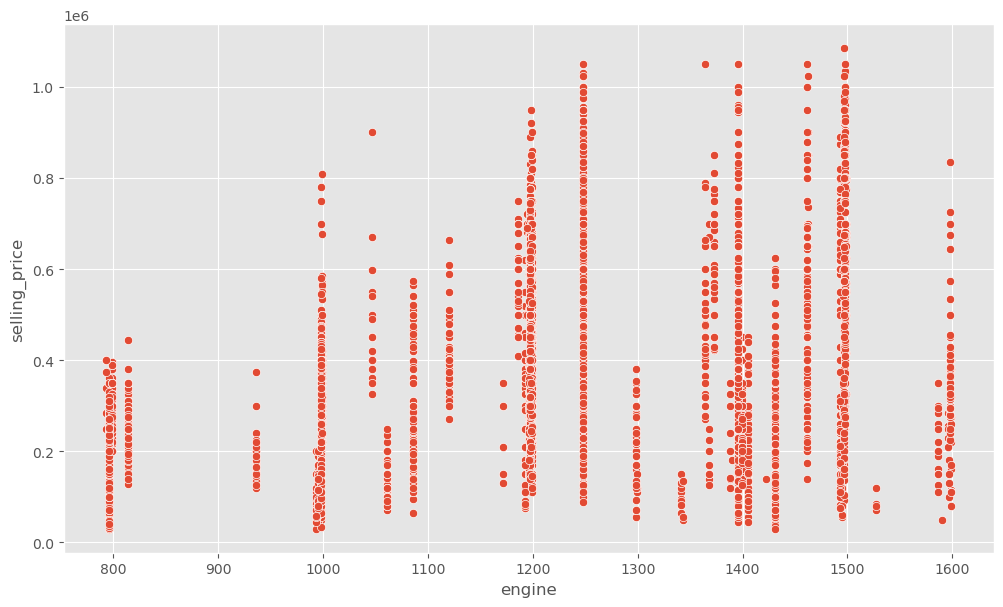

In [51]:

plt.figure(figsize = (12,7), dpi = 100)

sns.scatterplot('engine','selling_price', data = df)

### Conclusion : May be direct proportion

### Selling price vs power

<AxesSubplot:xlabel='max_power', ylabel='selling_price'>

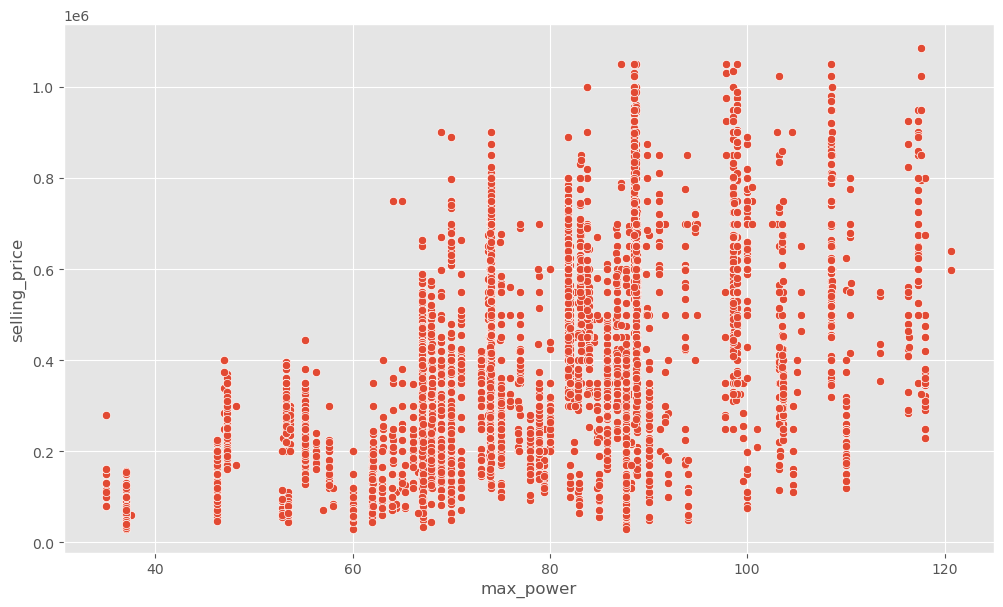

In [52]:
plt.figure(figsize = (12,7), dpi = 100)

sns.scatterplot('max_power','selling_price', data = df)

###  Conclusion : May be Direct proportion

### Selling price vs seller type

<AxesSubplot:xlabel='seller_type', ylabel='selling_price'>

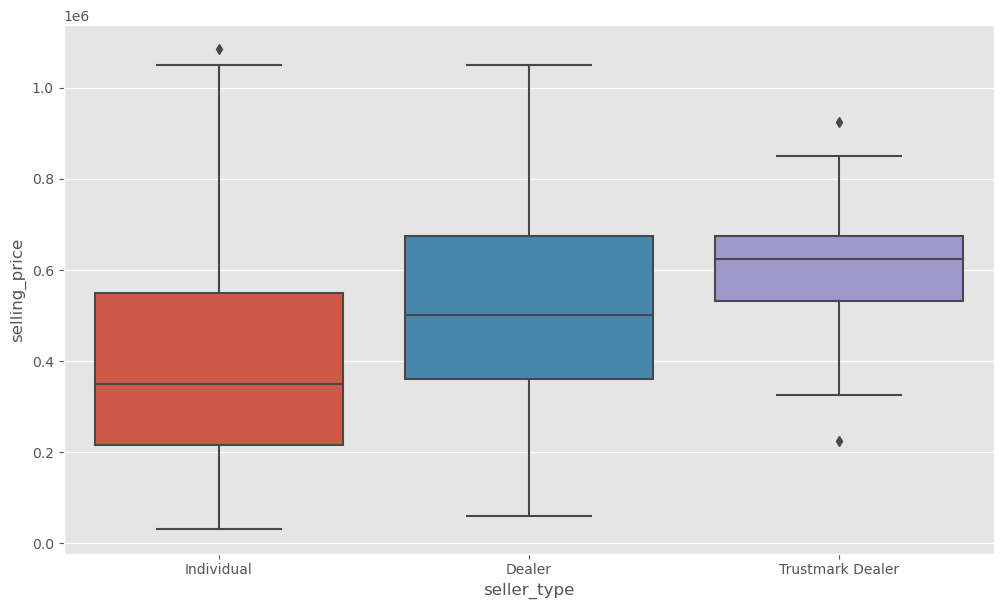

In [53]:
plt.figure(figsize = (12,7), dpi = 100)

sns.boxplot('seller_type','selling_price', data = df)

###  Conclusion :Trustmark dealer  > Dealer > Individual

### Selling Price vs Company

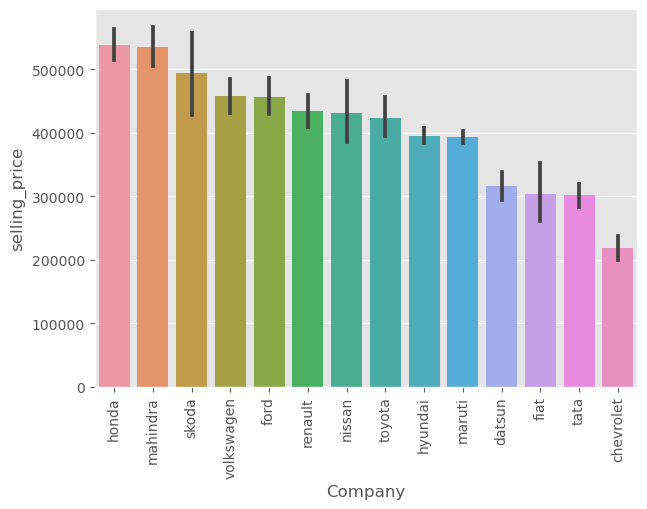

In [54]:
order = df.groupby('Company')['selling_price'].mean().sort_values(ascending = False)

plt.figure(figsize = (7,5), dpi = 100)

sns.barplot(data = df,x=df['Company'],y=df['selling_price'],order=order.index)
plt.xticks(rotation = 90)
plt.show()

In [55]:
df.corr()

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.740452,-0.462063,0.463354,0.059635,0.254480,0.198404
selling_price,0.740452,1.000000,-0.339051,0.388825,0.359411,0.537717,0.253975
km_driven,-0.462063,-0.339051,1.000000,-0.105954,0.245750,0.034737,0.031387
mileage,0.463354,0.388825,-0.105954,1.000000,-0.074043,-0.047909,-0.010726
engine,0.059635,0.359411,0.245750,-0.074043,1.000000,0.812223,0.177854
max_power,0.254480,0.537717,0.034737,-0.047909,0.812223,1.000000,0.193731
seats,0.198404,0.253975,0.031387,-0.010726,0.177854,0.193731,1.000000


<AxesSubplot:>

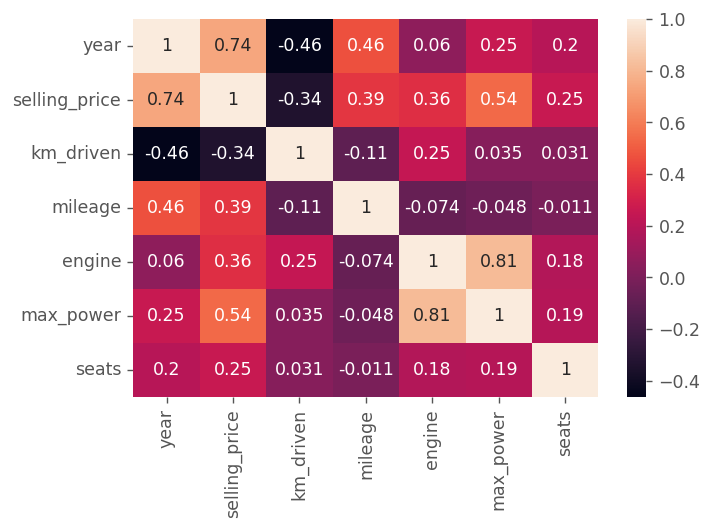

In [56]:
plt.figure(dpi = 125)

sns.heatmap(df.corr(), annot = True)

In [57]:
columns = ['owner', 'fuel', 'transmission', 'km_driven', 'year', 'seller_type', 'mileage', 'engine', 'max_power','Company','Model']

In [58]:
X = df[columns]

In [59]:
Y = df[['selling_price']]

In [60]:
X.head(10)

,owner,fuel,transmission,km_driven,year,seller_type,mileage,engine,max_power,Company,Model
0,First Owner,Diesel,Manual,145500,2014,Individual,23.40,1248.0,74.00,maruti,maruti swift
1,Second Owner,Diesel,Manual,120000,2014,Individual,21.14,1498.0,103.52,skoda,skoda rapid
2,Third Owner,Petrol,Manual,140000,2006,Individual,17.70,1497.0,78.00,honda,honda city
3,First Owner,Diesel,Manual,127000,2010,Individual,23.00,1396.0,90.00,hyundai,hyundai i20
4,First Owner,Petrol,Manual,120000,2007,Individual,16.10,1298.0,88.20,maruti,maruti swift
5,First Owner,Petrol,Manual,45000,2017,Individual,20.14,1197.0,81.86,hyundai,hyundai xcent
7,Second Owner,Petrol,Manual,5000,2001,Individual,16.10,796.0,37.00,maruti,maruti 800
8,First Owner,Diesel,Manual,90000,2011,Individual,23.59,1364.0,67.10,toyota,toyota etios
9,First Owner,Diesel,Manual,169000,2013,Individual,20.00,1399.0,68.10,ford,ford figo
10,Second Owner,Diesel,Manual,68000,2014,Individual,19.01,1461.0,108.45,renault,renault duster


In [61]:
Y[:10]

,selling_price
0,450000
1,370000
2,158000
3,225000
4,130000
5,440000
7,45000
8,350000
9,200000
10,500000


In [62]:
Y.shape

(5035, 1)

In [63]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

categorical_columns = ['owner', 'fuel', 'transmission', 'seller_type','Company','Model']
X[categorical_columns] = encoder.fit_transform(X[categorical_columns])

X.head()

,owner,fuel,transmission,km_driven,year,seller_type,mileage,engine,max_power,Company,Model
0,0.0,0.0,1.0,145500,2014,1.0,23.40,1248.0,74.00,7.0,47.0
1,2.0,0.0,1.0,120000,2014,1.0,21.14,1498.0,103.52,10.0,59.0
2,3.0,1.0,1.0,140000,2006,1.0,17.70,1497.0,78.00,4.0,15.0
3,0.0,0.0,1.0,127000,2010,1.0,23.00,1396.0,90.00,5.0,26.0
4,0.0,1.0,1.0,120000,2007,1.0,16.10,1298.0,88.20,7.0,47.0


In [64]:
numerical_columns = ['km_driven','year','mileage','engine','max_power']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])
Y[['selling_price']] = scaler.fit_transform(Y[['selling_price']])

In [65]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 42)

In [66]:
print('Training Data Shape   : ', x_train.shape)

print('Training labels Shape : ', y_train.shape)

print('Testing Data shape    : ', x_test.shape)

print('Testing labels shape  : ', y_test.shape)

Training Data Shape   :  (4531, 11)
Training labels Shape :  (4531, 1)
Testing Data shape    :  (504, 11)
Testing labels shape  :  (504, 1)


# 1. Linear Regression 

In [67]:
from sklearn.linear_model import LinearRegression                       # import the class

regressor = LinearRegression()                                          # create the object

regressor.fit(x_train, y_train)                                         # fit the object

LinearRegression()

In [68]:
regressor.intercept_

array([0.7805004])

In [69]:
regressor.coef_

array([[-0.06913651, -0.52270987, -0.28075618, -0.14335127,  0.49734498,
        -0.08061945,  0.01638154, -0.10335806,  0.41998563, -0.04480159,
         0.0053557 ]])

In [70]:
print('Training set score :', regressor.score(x_train, y_train))

print('Testing set score :', regressor.score(x_test, y_test))

Training set score : 0.7362665589904054
Testing set score : 0.734331053270112


# 2. SGD Regressor (Gradient Descent)

In [71]:
from sklearn.linear_model import SGDRegressor
regressor = SGDRegressor(loss= 'huber',alpha = 0.00075,l1_ratio=0)
regressor.fit(x_train, y_train)

SGDRegressor(alpha=0.00075, l1_ratio=0, loss='huber')

In [72]:
print('Training Set Score : ', regressor.score(x_train, y_train))
print('Testng Set Score   : ', regressor.score(x_test, y_test))

Training Set Score :  0.7146750173333324
Testng Set Score   :  0.7073108598763814


### Hyperparameter Tuning

In [73]:
from sklearn.linear_model import SGDRegressor
regressor = SGDRegressor()

In [74]:
search_params = {
    'l1_ratio'    : [0,1],
    'alpha' : [0.0005,0.00065,0.00075],
    'loss'    : ['squared_error','huber']
}

In [75]:
from sklearn.model_selection import RandomizedSearchCV
randomized_search = RandomizedSearchCV(
                                        estimator = regressor,
                                        param_distributions = search_params,
                                        n_iter = 20,
                                        scoring = ['r2','neg_mean_squared_error'],
                                        refit = 'r2',
                                        cv = 5,
                                        verbose = 3)

randomized_search.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END alpha=0.0005, l1_ratio=0, loss=squared_error; neg_mean_squared_error: (test=-697.720) r2: (test=-708.977) total time=   0.4s
[CV 2/5] END alpha=0.0005, l1_ratio=0, loss=squared_error; neg_mean_squared_error: (test=-4.333) r2: (test=-3.351) total time=   0.4s
[CV 3/5] END alpha=0.0005, l1_ratio=0, loss=squared_error; neg_mean_squared_error: (test=-414.088) r2: (test=-438.920) total time=   0.4s
[CV 4/5] END alpha=0.0005, l1_ratio=0, loss=squared_error; neg_mean_squared_error: (test=-86.793) r2: (test=-80.324) total time=   0.4s
[CV 5/5] END alpha=0.0005, l1_ratio=0, loss=squared_error; neg_mean_squared_error: (test=-1014.022) r2: (test=-1005.495) total time=   0.4s
[CV 1/5] END alpha=0.0005, l1_ratio=0, loss=huber; neg_mean_squared_error: (test=-0.308) r2: (test=0.687) total time=   0.0s
[CV 2/5] END alpha=0.0005, l1_ratio=0, loss=huber; neg_mean_squared_error: (test=-0.359) r2: (test=0.640) total time=   0.0s
[CV

RandomizedSearchCV(cv=5, estimator=SGDRegressor(), n_iter=20,
                   param_distributions={'alpha': [0.0005, 0.00065, 0.00075],
                                        'l1_ratio': [0, 1],
                                        'loss': ['squared_error', 'huber']},
                   refit='r2', scoring=['r2', 'neg_mean_squared_error'],
                   verbose=3)

In [76]:
randomized_search.best_params_

{'loss': 'huber', 'l1_ratio': 0, 'alpha': 0.0005}

In [77]:
from sklearn.linear_model import SGDRegressor
regressor = SGDRegressor(loss= 'huber',alpha = 0.0005,l1_ratio=0.15)
regressor.fit(x_train, y_train)

SGDRegressor(alpha=0.0005, loss='huber')

In [78]:
print('Training Set Score : ', regressor.score(x_train, y_train))
print('Testng Set Score   : ', regressor.score(x_test, y_test))

Training Set Score :  0.715235621590252
Testng Set Score   :  0.7077636409448675


# 3. Regularisation
- 1.Lasso
- 2.Ridge

In [79]:
from sklearn.linear_model import Lasso
regressor = Lasso(alpha = 0.01)
regressor.fit(x_train, y_train)

print('Training Set Score : ', regressor.score(x_train, y_train))
print('Testng Set Score   : ', regressor.score(x_test, y_test))

Training Set Score :  0.730457629811637
Testng Set Score   :  0.723484869556152


In [80]:
from sklearn.linear_model import Ridge
regressor = Ridge(alpha = 1)
regressor.fit(x_train, y_train)

print('Training Set Score : ', regressor.score(x_train, y_train))
print('Testng Set Score   : ', regressor.score(x_test, y_test))

Training Set Score :  0.7362661752028579
Testng Set Score   :  0.7343111268946683


# 4. KNN Regressor 

In [81]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors = 5)
regressor.fit(x_train, y_train)

print('Training Set Score : ', regressor.score(x_train, y_train))
print('Testng Set Score   : ', regressor.score(x_test, y_test))

Training Set Score :  0.9210606539022129
Testng Set Score   :  0.8890545047781794


# 5. DecisionTreeRegressor

In [82]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth = 10)
regressor.fit(x_train, y_train)

print('Training Set Score : ', regressor.score(x_train, y_train))
print('Testng Set Score   : ', regressor.score(x_test, y_test))

Training Set Score :  0.9363388784307998
Testng Set Score   :  0.8732468991851949


# 6. Random Forest Regressor

In [83]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 50, max_depth = 5)
regressor.fit(x_train, y_train)

print('Training Set Score : ', regressor.score(x_train, y_train))
print('Testng Set Score   : ', regressor.score(x_test, y_test))

Training Set Score :  0.8528293705301493
Testng Set Score   :  0.849654892318916


# 7. XGBoost Regressor

In [84]:
from xgboost import XGBRegressor
regressor = XGBRegressor(n_estimators = 50, max_depth = 5)
regressor.fit(x_train, y_train)

print('Training Set Score : ', regressor.score(x_train, y_train))
print('Testng Set Score   : ', regressor.score(x_test, y_test))

Training Set Score :  0.9441921658229765
Testng Set Score   :  0.9229765988290848


# 8. LightGBM Regressor

In [85]:
from lightgbm import LGBMRegressor
regressor = LGBMRegressor(n_estimators = 50, max_depth = 5)
regressor.fit(x_train, y_train)

print('Training Set Score : ', regressor.score(x_train, y_train))
print('Testng Set Score   : ', regressor.score(x_test, y_test))

Training Set Score :  0.9162463877988525
Testng Set Score   :  0.9078937838320417


# 9. Polynomial Regressor

In [86]:
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression       
regressor = LinearRegression() 

poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_poly, Y, test_size = 0.1, random_state = 42)

regressor.fit(x_train,y_train)

print('Training Set Score : ', regressor.score(x_train, y_train))
print('Testing Set Score   : ', regressor.score(x_test, y_test))

Training Set Score :  0.8564465024594502
Testing Set Score   :  0.8545504562018967
